In [1]:
import environ

env = environ.Env()
environ.Env.read_env()
#Todo only load the repo folder
DataSetsPath     = env('DataSetsPath')     #* get the path of the script
ModelsPath       = env('ModelsPath')       #* get the path of the script
fitToolsPath     = env('fitToolsPath')     #* get the path of the script
TestNotebooks    = env('TestNotebooks')    #* get the path of the script   
dataPreparation  = env('dataPreparation')  #* get the path of the script
model_save_dir   = env('model_save_dir')   #* get the path w\here we will save the model
DataSet_Brain_MRI_segmentation   = env('DataSet_Brain_MRI_segmentation')   #* get the path where we will save the model
newFoldersPath   =   env('newFoldersPath')


import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(fitToolsPath)
sys.path.append(TestNotebooks)
sys.path.append(dataPreparation)


import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"
print("device = ", device)

device =  cuda


In [2]:
image_Height   = 252
image_Width    = 252

outPutimage_Height = 68
outPutimage_Width  = 68

image_Channels = 3
batch_size     = 16

In [3]:
# import importlib
# import dataPreparation.brain_MRI_segmentation_preparation 
# importlib.reload(dataPreparation.brain_MRI_segmentation_preparation)
# from dataPreparation.brain_MRI_segmentation_preparation import preparation_brain_MRI_Set

# preparation_brain_MRI_Set(DataSet_Brain_MRI_segmentation, newFoldersPath)

In [4]:
from DataSets.dataSet_Img_Vs_Img import DataSet_Img_To_Img
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler


inputResize = transforms.Compose([
    transforms.ToPILImage(),  # Convert to PIL Image
    transforms.Resize((image_Height, image_Width)),  # Resize the image
    transforms.Grayscale(num_output_channels = image_Channels),  # Convert to black and white
    transforms.ToTensor(),  # Convert to tensor
])


outPutResize = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((outPutimage_Height, outPutimage_Width)),
                        # transforms.RandomRotation(degrees=5),  # Randomly rotate the image by up to 5 degrees
                                        
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        # transforms.RandomVerticalFlip(),
                        # transforms.RandomHorizontalFlip(),
                        # transforms.RandomRotation(degrees=15),  
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])

root_Data            = [newFoldersPath + "/train/img", newFoldersPath + "/train/mask"]
root_Data_Validation = [newFoldersPath + "/validation/img", newFoldersPath + "/validation/mask"]

myDataSet            = DataSet_Img_To_Img(root_Data, transfor_In_img = inputResize, transfor_Out_img = outPutResize, test = False, dataSize = 100)
myDataSetValidation  = DataSet_Img_To_Img(root_Data_Validation, transfor_In_img = inputResize, transfor_Out_img = outPutResize, test = False, dataSize = 100)


Size data set lower definition 3929
Size data set lower definition 785


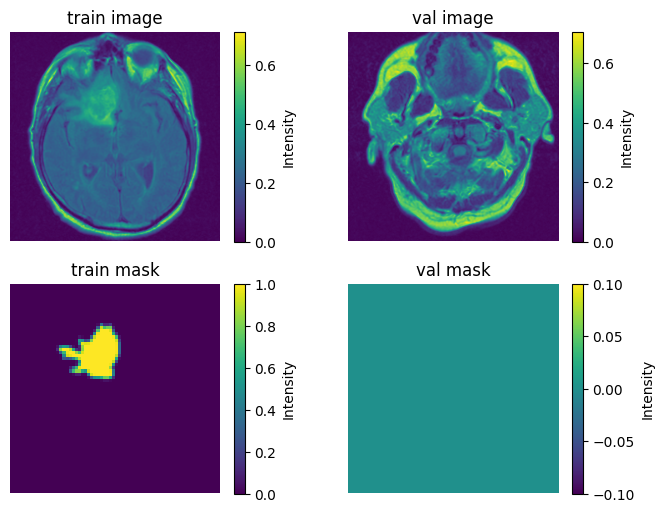

In [5]:
import matplotlib.pyplot as plt
from TestNotebooks.toolsTest import plot_img_tensor

index = 3
fig, (plt1, plt2) = plt.subplots(2, 2, figsize=(8, 6))
plot_img_tensor(myDataSet.__getitem__(index=index)[0], plot_channels = [0], title = "train image", localplt = (fig, plt1[0]))
plot_img_tensor(myDataSet.__getitem__(index=index)[1], plot_channels = [0], title = "train mask" , localplt = (fig, plt2[0]))
plot_img_tensor(myDataSetValidation.__getitem__(index=index)[0], plot_channels = [0], title = "val image", localplt = (fig, plt1[1]))
plot_img_tensor(myDataSetValidation.__getitem__(index=index)[1], plot_channels = [0], title = "val mask" , localplt = (fig, plt2[1]))
plt.show()



In [6]:
# import os

# files = os.listdir(model_save_dir)
# file_paths = [os.path.join(model_save_dir, file) for file in files]
# file_paths.sort(key=os.path.getmtime, reverse=True)

# lastSavedModel = file_paths[0]
# print(lastSavedModel) # checkpoint_epoch_10_Val_MAE_0.317.pt


In [7]:
import importlib
import Models.model_U_Net
importlib.reload(Models.model_U_Net)
from Models.model_U_Net import model_u_Net

myModel = model_u_Net(in_CHANNELS = 3)
myModel.to(device = device)
print(myModel)
# myModel.load_state_dict(torch.load(lastSavedModel)['model_state_dict'])

# ''' 
#     The convergence of the model could depend of the start values of the models. 
#     So if we see that the model go to the constant function 0 
#     i.e modelOutPut = tensor(2,64,64) where modelOutPut[0,i,j] = 1 for all i, j meabe we
#     need to take other start value for the model. 
# '''


model_u_Net(
  (downsampling1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): SiLU()
  )
  (downsampling2): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (1): SiLU()
      (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
      (4): SiLU()
    )
  )
  (downsampling3): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
      (1): SiLU()
      (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      

In [8]:
import importlib

import fitTools.fitFunctions_superResolution
importlib.reload(fitTools.fitFunctions_superResolution)
from fitTools.fitFunctions_superResolution import fiterU_Net

import torch.nn as nn
from torch import optim
import torch.nn.functional as F


trainerModel = fiterU_Net(myModel, 
                        myDataSet, 
                        device      = device,
                        batch_size  = batch_size,
                        dataSet_Val = myDataSetValidation,
                        model_save_dir =  model_save_dir)

#TODO add gradiente decent with adjustable step size
# opt_model = optim.Adam(myModel.parameters(), lr = 0.0001)

opt_model = torch.optim.SGD(myModel.parameters(),
                                lr = 0.001,
                                momentum=0.95,
                                weight_decay=1e-4
                            )

criterion  = torch.nn.CrossEntropyLoss()

In [9]:

trainerModel.trainModel(opt_model  = opt_model,
                        criterion  = criterion,
                        num_epochs = 10,
                        getValMAE  = True)


  0%|          | 0/246 [00:00<?, ?it/s]

C:\Users\malekir1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Epoch 1/10 process: 99: 100%|██████████| 246/246 [01:07<00:00,  3.63it/s, modelLoss=0.567]


Epoch completed, TRAIN MAE 0.6605
Epoch completed, VAL MAE: 0.576361


Epoch 2/10 process: 99: 100%|██████████| 246/246 [01:08<00:00,  3.57it/s, modelLoss=0.42] 


Epoch completed, TRAIN MAE 0.4848
Epoch completed, VAL MAE: 0.427733


Epoch 3/10 process: 99: 100%|██████████| 246/246 [01:08<00:00,  3.60it/s, modelLoss=0.365]


Epoch completed, TRAIN MAE 0.3856
Epoch completed, VAL MAE: 0.368705


Epoch 4/10 process: 99: 100%|██████████| 246/246 [01:08<00:00,  3.61it/s, modelLoss=0.343]


Epoch completed, TRAIN MAE 0.3505
Epoch completed, VAL MAE: 0.349684


Epoch 5/10 process: 99: 100%|██████████| 246/246 [01:07<00:00,  3.62it/s, modelLoss=0.332]


Epoch completed, TRAIN MAE 0.3383
Epoch completed, VAL MAE: 0.341294


Epoch 6/10 process: 99: 100%|██████████| 246/246 [01:08<00:00,  3.61it/s, modelLoss=0.33] 


Epoch completed, TRAIN MAE 0.3321
Epoch completed, VAL MAE: 0.336863


Epoch 7/10 process: 99: 100%|██████████| 246/246 [01:08<00:00,  3.62it/s, modelLoss=0.336]


Epoch completed, TRAIN MAE 0.3287
Epoch completed, VAL MAE: 0.333860


Epoch 8/10 process: 99: 100%|██████████| 246/246 [01:08<00:00,  3.61it/s, modelLoss=0.332]


Epoch completed, TRAIN MAE 0.3265
Epoch completed, VAL MAE: 0.331696


Epoch 9/10 process: 99: 100%|██████████| 246/246 [01:08<00:00,  3.61it/s, modelLoss=0.321]


Epoch completed, TRAIN MAE 0.3251
Epoch completed, VAL MAE: 0.330389


Epoch 10/10 process: 99: 100%|██████████| 246/246 [01:08<00:00,  3.61it/s, modelLoss=0.327]


Epoch completed, TRAIN MAE 0.3242
Epoch completed, VAL MAE: 0.330103


In [12]:

opt_model.param_groups[0]["lr"] = 0.00001
trainerModel.trainModel(opt_model  = opt_model,
                        criterion  = criterion,
                        num_epochs = 5,
                        getValMAE  = True)

Epoch 1/5 process: 99: 100%|██████████| 246/246 [01:09<00:00,  3.54it/s, modelLoss=0.33] 


Epoch completed, TRAIN MAE 0.3238
Epoch completed, VAL MAE: 0.330120


Epoch 2/5 process: 99: 100%|██████████| 246/246 [01:09<00:00,  3.53it/s, modelLoss=0.325]


Epoch completed, TRAIN MAE 0.3238
Epoch completed, VAL MAE: 0.329783


Epoch 3/5 process: 99: 100%|██████████| 246/246 [01:09<00:00,  3.52it/s, modelLoss=0.328]


Epoch completed, TRAIN MAE 0.3237
Epoch completed, VAL MAE: 0.330070


Epoch 4/5 process: 99: 100%|██████████| 246/246 [01:10<00:00,  3.50it/s, modelLoss=0.32] 


Epoch completed, TRAIN MAE 0.3237
Epoch completed, VAL MAE: 0.329933


Epoch 5/5 process: 99: 100%|██████████| 246/246 [01:09<00:00,  3.54it/s, modelLoss=0.327]


Epoch completed, TRAIN MAE 0.3237
Epoch completed, VAL MAE: 0.329784


In [35]:
trainerModel.toggle_trainingLayers(["downsampling"], enable = False)
opt_model.param_groups[0]["lr"] = 0.000001
trainerModel.trainModel(opt_model  = opt_model,
                        criterion  = criterion,
                        num_epochs = 5,
                        getValMAE  = True)

centerBlock.1.0.weight : True
centerBlock.1.0.bias : True
centerBlock.1.2.weight : True
centerBlock.1.2.bias : True
centerBlock.1.3.weight : True
centerBlock.1.3.bias : True
centerBlock.2.0.weight : True
centerBlock.2.0.bias : True
centerBlock.2.1.weight : True
centerBlock.2.1.bias : True
upsampling1.0.0.weight : True
upsampling1.0.0.bias : True
upsampling1.0.2.weight : True
upsampling1.0.2.bias : True
upsampling1.0.3.weight : True
upsampling1.0.3.bias : True
upsampling1.1.0.weight : True
upsampling1.1.0.bias : True
upsampling1.1.1.weight : True
upsampling1.1.1.bias : True
upsampling2.0.0.weight : True
upsampling2.0.0.bias : True
upsampling2.0.2.weight : True
upsampling2.0.2.bias : True
upsampling2.0.3.weight : True
upsampling2.0.3.bias : True
upsampling2.1.0.weight : True
upsampling2.1.0.bias : True
upsampling2.1.1.weight : True
upsampling2.1.1.bias : True
upsampling3.0.0.weight : True
upsampling3.0.0.bias : True
upsampling3.0.2.weight : True
upsampling3.0.2.bias : True
upsampling3.0.

  0%|          | 0/246 [00:00<?, ?it/s]C:\Users\malekir1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Epoch 1/5 process: 99: 100%|██████████| 246/246 [00:58<00:00,  4.17it/s, modelLoss=0.327]


Epoch completed, TRAIN MAE 0.3237
Epoch completed, VAL MAE: 0.330055


Epoch 2/5 process: 99: 100%|██████████| 246/246 [00:41<00:00,  5.89it/s, modelLoss=0.324]


Epoch completed, TRAIN MAE 0.3236
Epoch completed, VAL MAE: 0.329900


Epoch 3/5 process: 99: 100%|██████████| 246/246 [00:40<00:00,  6.06it/s, modelLoss=0.334]


Epoch completed, TRAIN MAE 0.3237
Epoch completed, VAL MAE: 0.329819


Epoch 4/5 process: 99: 100%|██████████| 246/246 [00:41<00:00,  5.98it/s, modelLoss=0.32] 


Epoch completed, TRAIN MAE 0.3238
Epoch completed, VAL MAE: 0.329679


Epoch 5/5 process: 99: 100%|██████████| 246/246 [00:38<00:00,  6.40it/s, modelLoss=0.321]


Epoch completed, TRAIN MAE 0.3236
Epoch completed, VAL MAE: 0.329816


In [70]:
index = 17
imgInput, imgOutPut = trainerModel.getDataBatch(index)
imgInput    = imgInput.to(device)
imgOutPut   = imgOutPut.to(device, torch.long)
modelOutPut = myModel(imgInput)


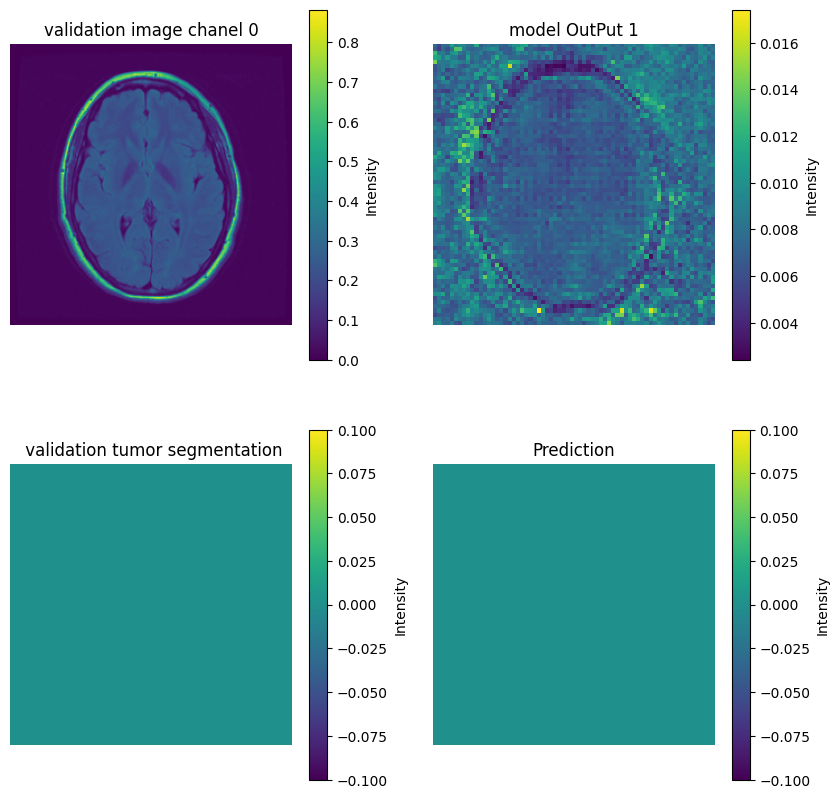

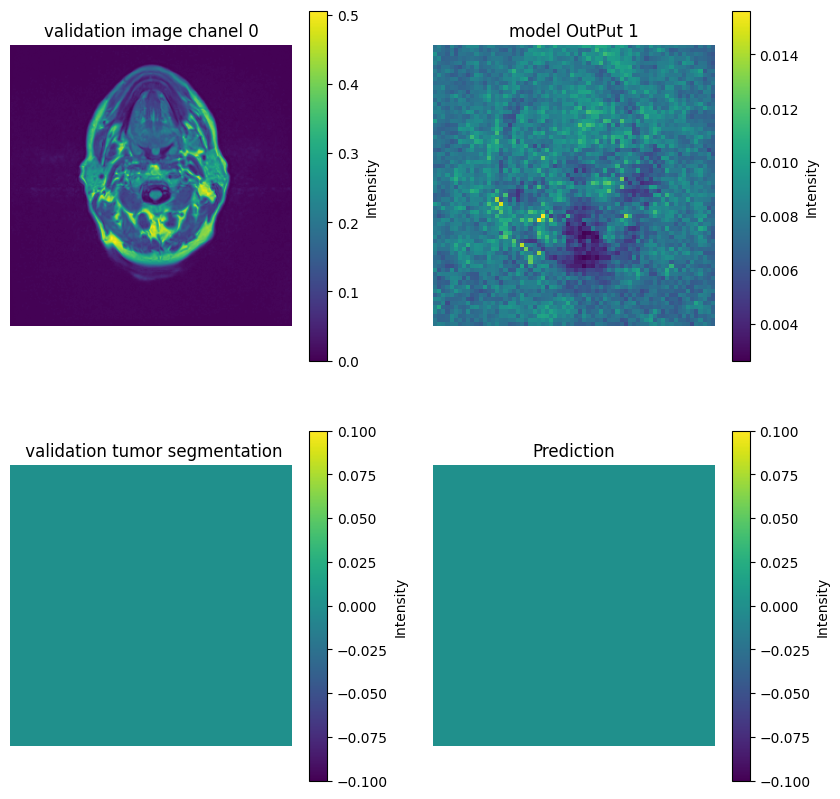

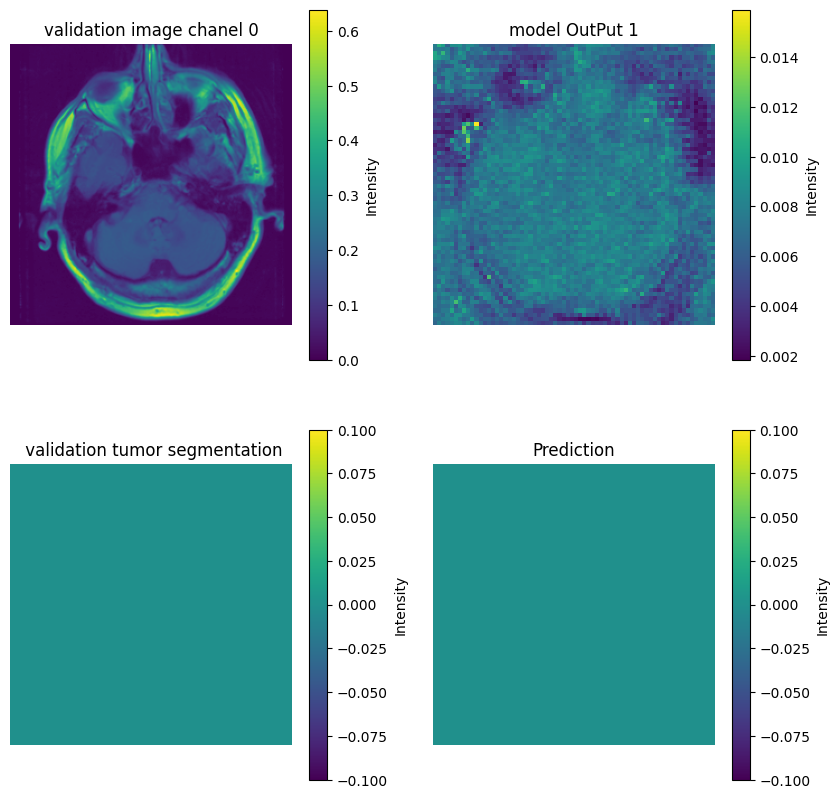

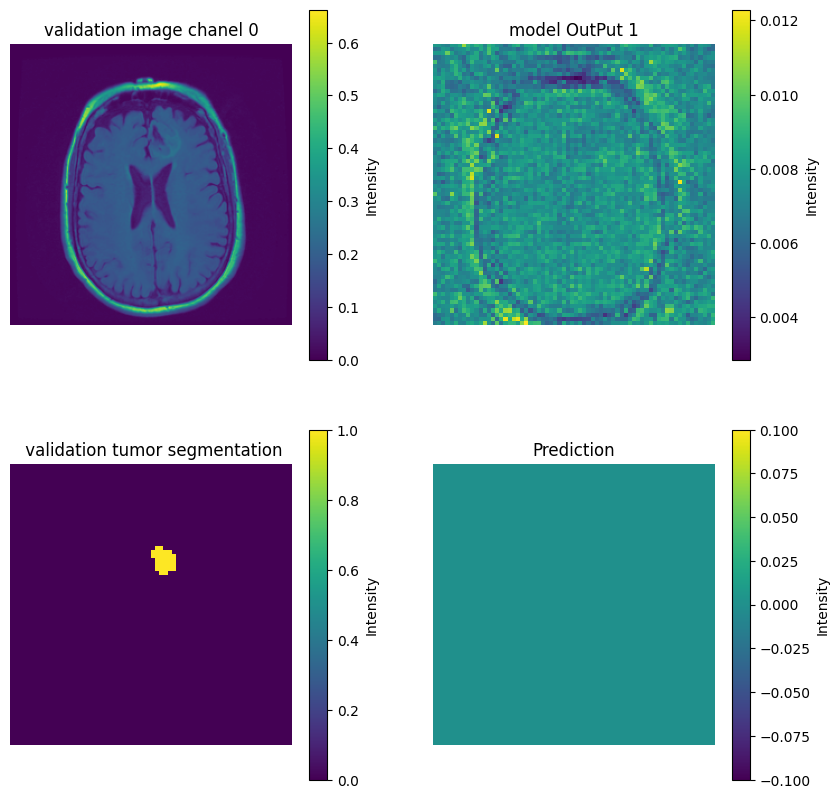

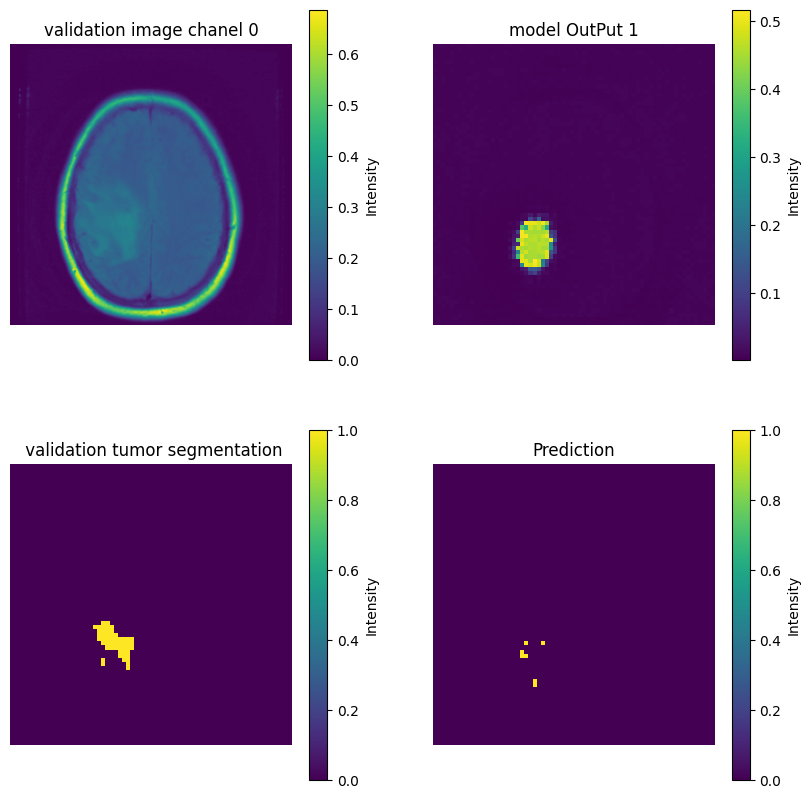

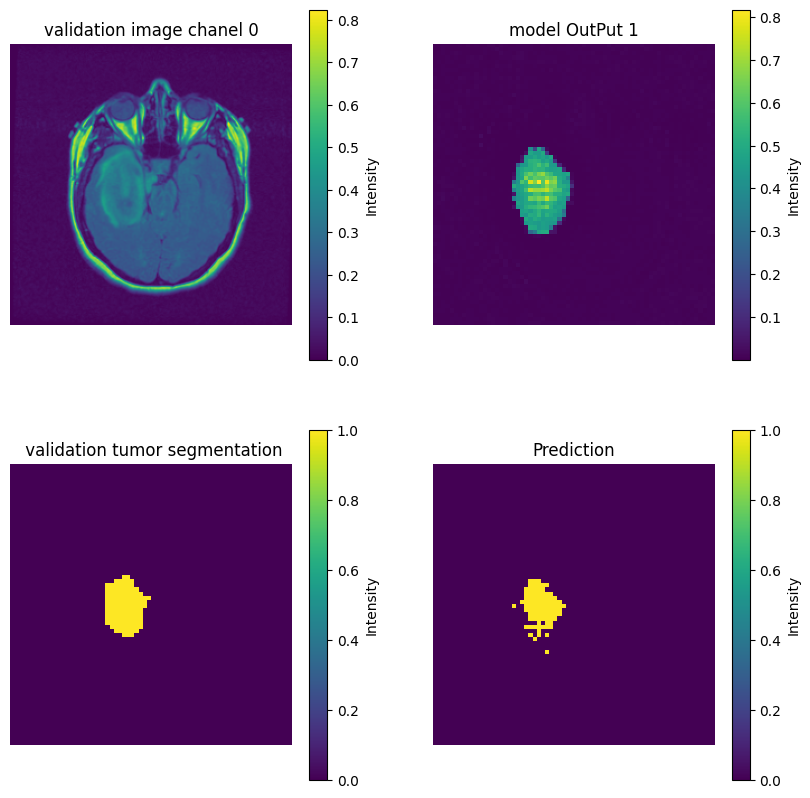

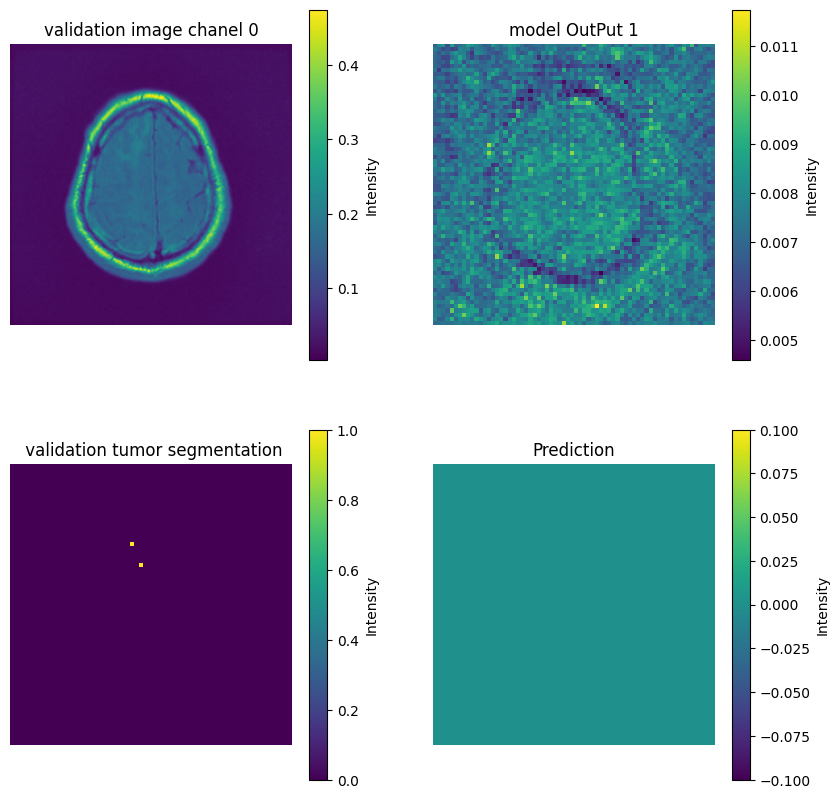

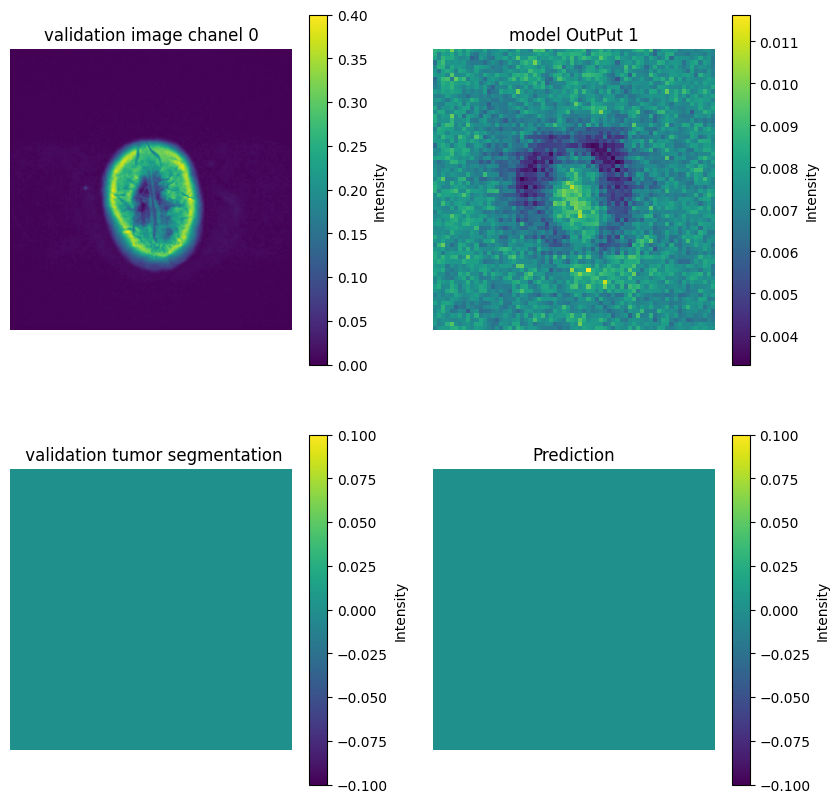

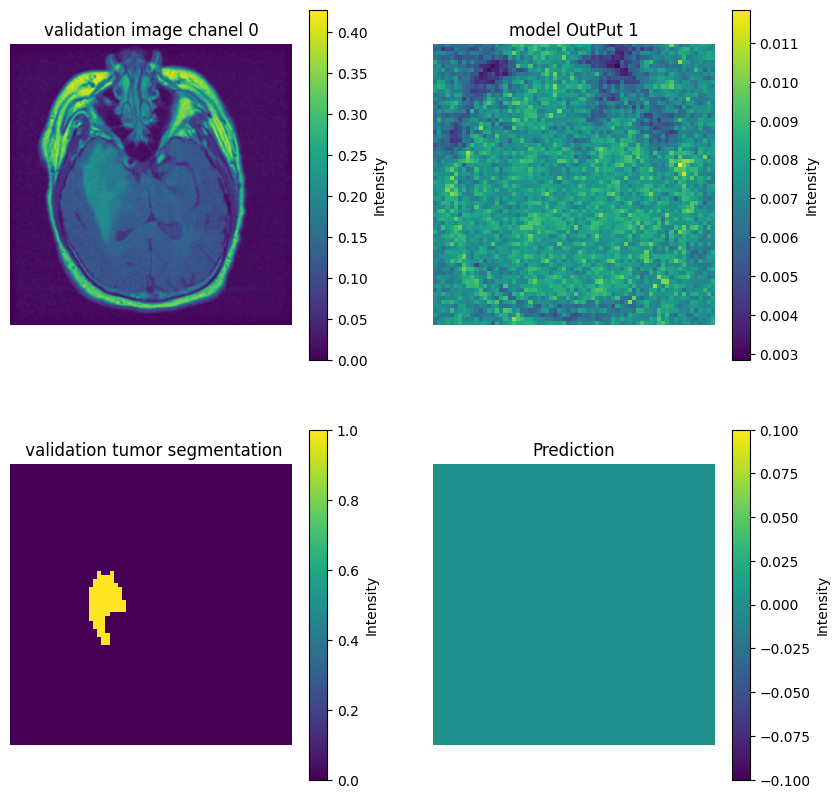

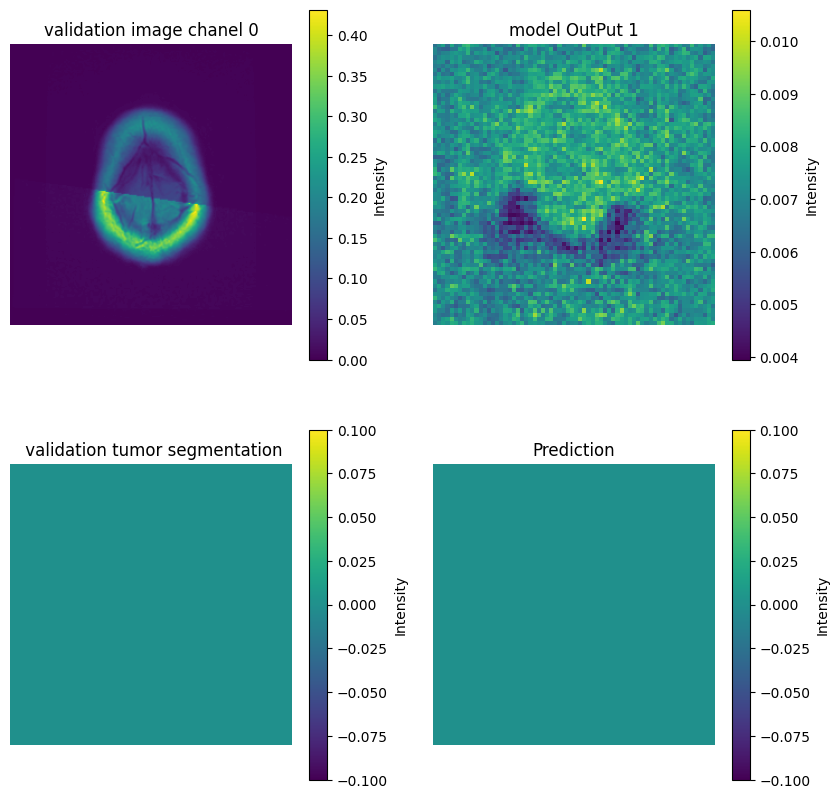

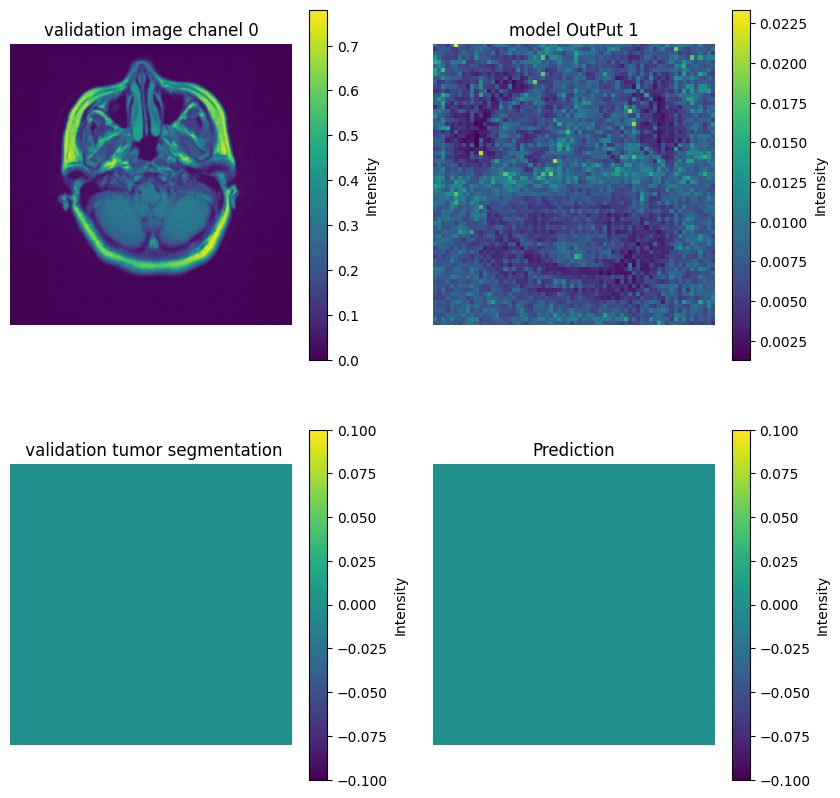

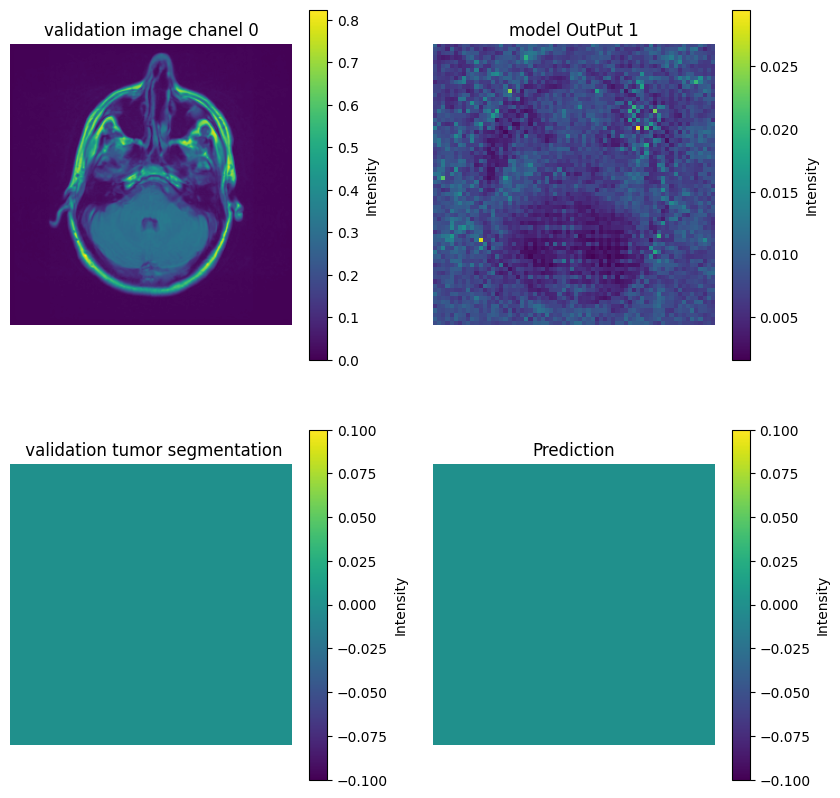

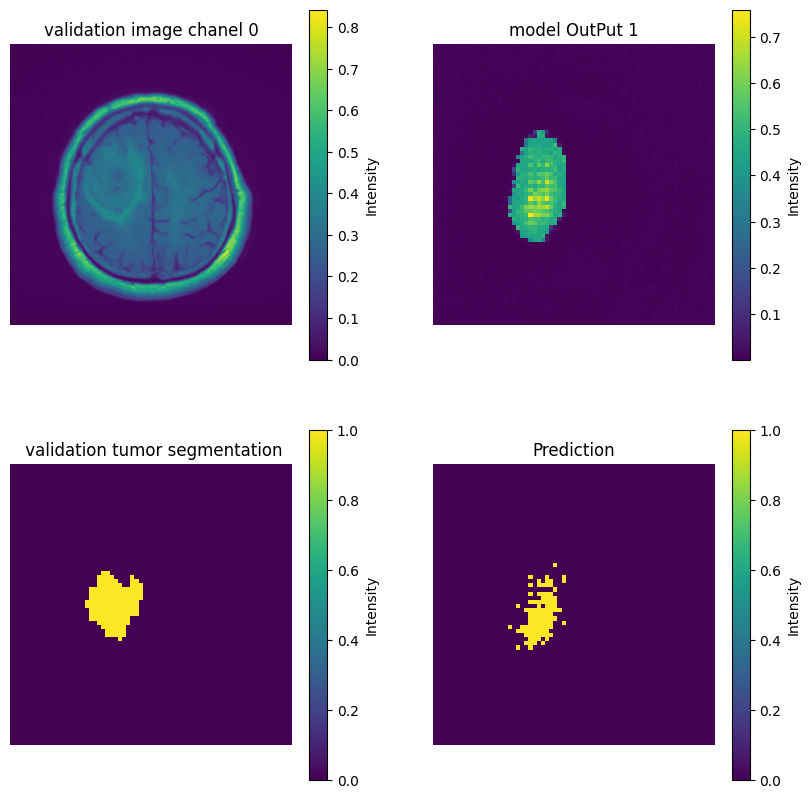

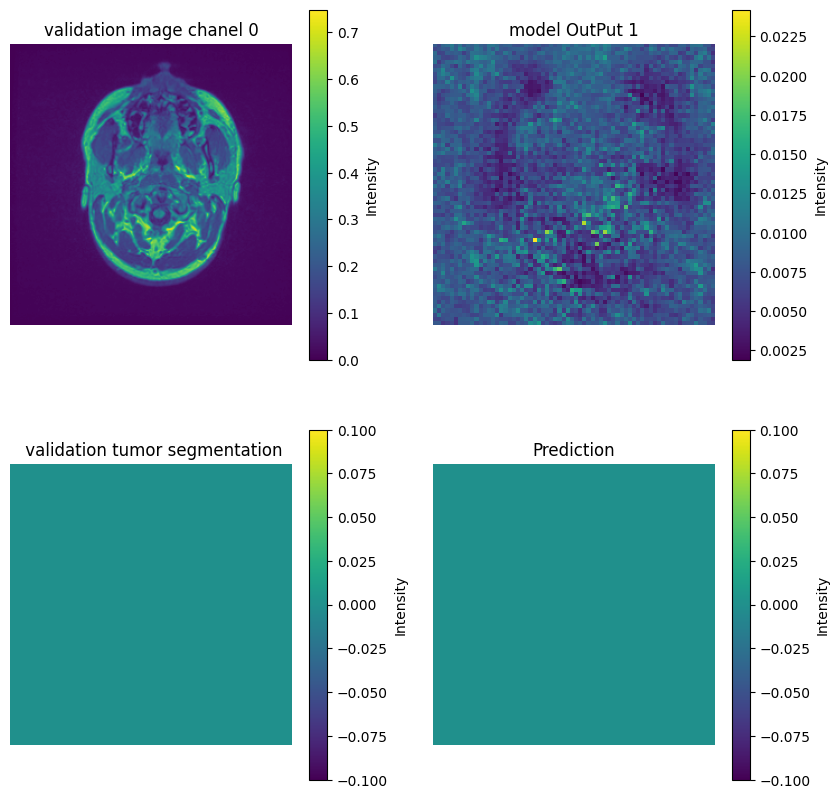

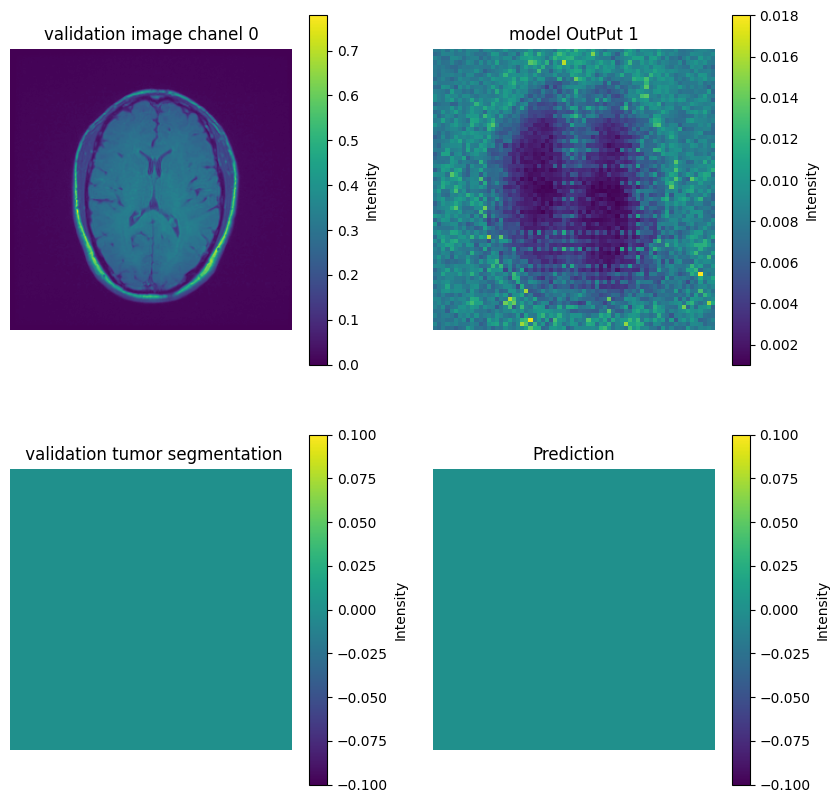

In [71]:

for i in range(15):
    # index = 1
    # imgInput, imgOutPut = trainerModel.getDataBatch(index)    
    # imgInput    = imgInput.to(device)
    # imgOutPut   = imgOutPut.to(device, torch.long)
    # modelOutPut = myModel(imgInput)
    prediction = torch.argmax(modelOutPut[i], dim = 0)
    prediction = prediction.unsqueeze(0)

    fig, (plt1, plt2) = plt.subplots(2, 2, figsize=(10, 10))
    plot_img_tensor(imgInput[i], [0], title = "validation image chanel 0", localplt = (fig, plt1[0]))
    plot_img_tensor(imgOutPut[i], [0], title = " validation tumor segmentation", localplt = (fig, plt2[0]))
    plot_img_tensor(modelOutPut[i], [1], title = "model OutPut 1", localplt = (fig, plt1[1]))
    plot_img_tensor(prediction, [0], title = "Prediction", localplt = (fig, plt2[1]))
    plt.show()


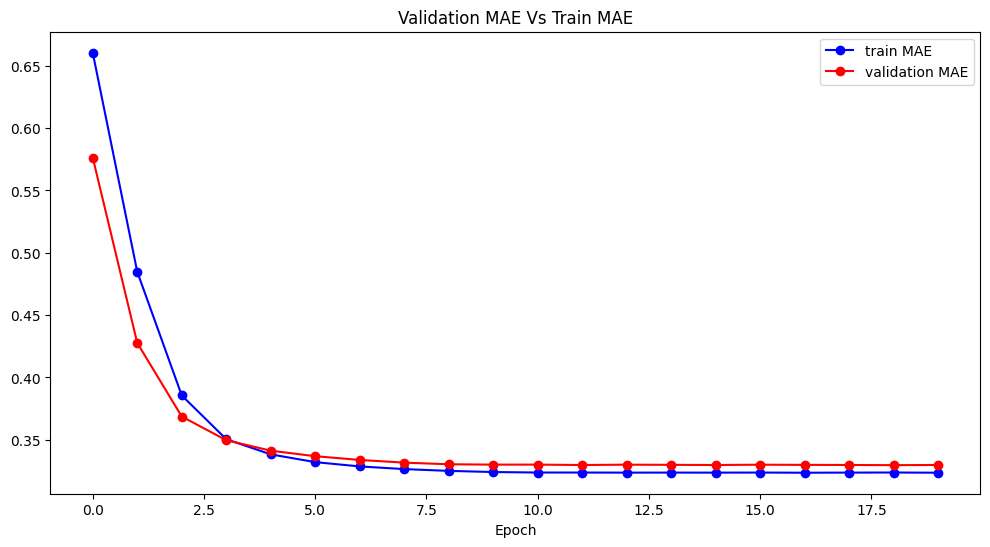

In [53]:
trainerModel.printHistorial()

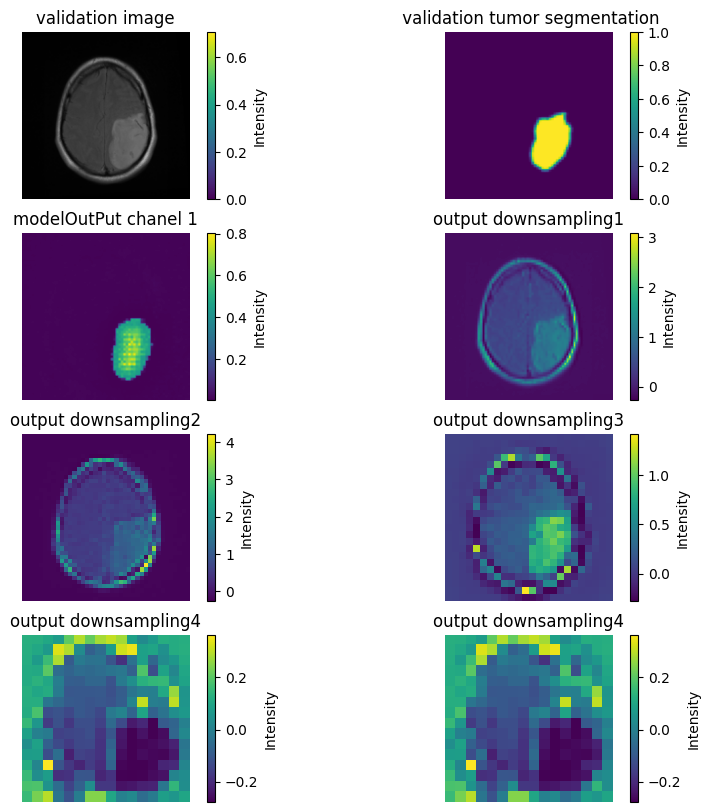

In [57]:
imgInput, imgOutPut = trainerModel.getDataBatch()
imgInput, imgOutPut = imgInput.to(device), imgOutPut.to(device) 
modelOutPut = myModel.outPutsCopys(imgInput)

fig, (plt1, plt2, plt3, plt4) = plt.subplots(4, 2, figsize=(10, 10))
plot_img_tensor(   imgInput[0], [0, 1, 2], title = "validation image", localplt = (fig, plt1[0]))
plot_img_tensor(  imgOutPut[0], [0], title = " validation tumor segmentation", localplt = (fig, plt1[1]))

plot_img_tensor(modelOutPut[0][0], [1], title = "modelOutPut chanel 1", localplt = (fig, plt2[0]))
plot_img_tensor(modelOutPut[1][0], [0], title = "output downsampling1", localplt = (fig, plt2[1]))
plot_img_tensor(modelOutPut[2][0], [0], title = "output downsampling2", localplt = (fig, plt3[0]))
plot_img_tensor(modelOutPut[3][0], [0], title = "output downsampling3", localplt = (fig, plt3[1]))
plot_img_tensor(modelOutPut[4][0], [0], title = "output downsampling4", localplt = (fig, plt4[0]))
plot_img_tensor(modelOutPut[4][0], [0], title = "output downsampling4", localplt = (fig, plt4[1]))

plt.show()


In [23]:
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⢿⣶⣾⣿⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡞⠀⠀⣀⠀⠈⠛⣿⣿⢿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⠁⠀⠀⢸⡀⠀⢀⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀⠈⣧⠀⢸⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⠀⠀⠀⠀⠀⠘⠀⣾⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⡀⠀⠀⠀⠀⠀⢀⣿⠀⠀⢸⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⣷⡀⠀⠀⠀⡆⣼⡏⠀⠀⠈⢿⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣿⣦⠀⠀⣇⠾⠁⠀⢠⠀⠈⣿⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⣿⣿⣧⠀⣿⣦⠀⠀⡏⢀⣰⣿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⡀⠀⠀⣿⣿⡟⢀⣿⣿⠀⣸⣇⠈⠿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠻⠗⠀⣴⣿⡿⢁⣾⣿⡟⠀⢿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠀⠉⠙⡿⢋⠄⣼⣿⣿⣿⡀⠈⢿⣿⠆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⡟⠀⣿⣆⣀⡞⣰⣿⣿⣿⣿⣷⣦⣠⡯⠀⠻⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⡀⠉⢹⠏⣰⣿⣿⣿⣿⣿⣿⣿⡏⢀⠀⣠⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡄⢹⡀⣿⣿⣿⣿⣿⣿⣿⣿⣷⡾⢐⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣦⣅⢹⣿⣿⣿⣿⣿⣿⣿⡟⣴⡟⠀⠀⣀⣀⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣠⣾⣿⣿⣿⣿⣿⣿⣿⢃⡿⢡⡇⠘⢛⣛⡉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⣠⣴⠶⠛⠓⣀⣛⠿⠿⠿⣿⡿⠿⢿⣿⠟⢨⣴⡟⠱⠶⣬⣙⡛⠿⢷⣦⣄⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠐⠉⢁⣠⣶⡿⢛⣭⠗⣰⡆⠀⣶⠀⣶⡆⠒⢦⡉⠻⢿⣶⣤⡉⠛⠳⢶⣬⣍⡓⠂⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⢀⣤⣶⠿⢋⣡⣶⠟⢉⣴⠏⠀⢸⡿⠀⣿⡇⠀⠀⠙⢶⣄⡈⠙⠿⣿⣶⣤⣌⠉⠛⠻⣶⣤⣀⠀⠀
# ⠀⠀⢀⣠⡾⠟⠋⢀⣴⡿⠛⠁⣤⣿⠋⠀⢀⣿⠁⠀⢸⣇⠀⠀⠀⠀⠙⣿⣦⡀⠀⠉⠻⢿⣿⣷⣦⣄⡈⠉⠓⠂
# ⠠⠖⠋⠁⠀⠠⠶⠋⠁⠀⣠⣾⠟⠁⠀⠀⣼⡏⠀⠀⠸⣿⠀⠀⠀⠀⠀⠈⠻⣿⣷⡄⠀⠀⠉⠛⠿⡏⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⢀⣴⡿⠟⠁⠀⠀⠀⠀⣿⠀⠀⠀⠀⣿⠀⠀⠀⠀⠀⠀⠀⠈⠙⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠤⠿⠋⠀⠀⠀⠀⠀⠀⠀⠋⠀⠀⠀⠁⠿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠒⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀